In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)

data = np.random.randn(100, 10)
df = pd.DataFrame(data, columns=[f"var{i+1}" for i in range(10)])

df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,0.471435,-1.190976,1.432707,-0.312652,-0.720589,0.887163,0.859588,-0.636524,0.015696,-2.242685
1,1.150036,0.991946,0.953324,-2.021255,-0.334077,0.002118,0.405453,0.289092,1.321158,-1.546906
2,-0.202646,-0.655969,0.193421,0.553439,1.318152,-0.469305,0.675554,-1.817027,-0.183109,1.058969
3,-0.397840,0.337438,1.047579,1.045938,0.863717,-0.122092,0.124713,-0.322795,0.841675,2.390961
4,0.076200,-0.566446,0.036142,-2.074978,0.247792,-0.897157,-0.136795,0.018289,0.755414,0.215269


In [2]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(df)

df_s = pd.DataFrame(scaled_data, columns=[f"var{i+1}" for i in range(10)])

df_s.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,0.396759,-1.169771,1.509972,-0.242212,-0.542748,1.019232,0.761109,-0.744043,-0.102699,-2.106934
1,1.199705,1.076854,0.958638,-1.823511,-0.169623,0.045435,0.307314,0.234588,1.245020,-1.430360
2,-0.400840,-0.619152,0.084682,0.559349,1.425383,-0.473264,0.577213,-1.992162,-0.307939,1.103584
3,-0.631800,0.403246,1.067040,1.015153,0.986687,-0.091231,0.026784,-0.412345,0.750016,2.398808
4,-0.070899,-0.527016,-0.096204,-1.873232,0.392094,-0.944020,-0.234528,-0.051725,0.660963,0.283172


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_s, test_size=0.2, random_state=1234)
train.shape, test.shape

((80, 10), (20, 10))

In [4]:
from sklearn.decomposition import PCA

# svd_solver = SVD 알고리즘 방식 지정
# "auto" 기본값. 데이터 크기와 n_components에 따라 아래 알고리즘 중 적절한 것을 자동 선택함.
# "full" 정확한 고전적인 SVD 방식 사용. 데이터 크기가 작거나, 정확도가 중요한 경우에 적합. 계산 비용이 큼.
# "arpack" 희소한 데이터나 n_components < min(n_samples, n_features)인 경우에 적합한 희소 SVD 방식.
# "randomized" 대규모 데이터에 대해 근사적인 SVD 계산. 속도가 빠르고, 대용량 데이터셋에 적합. 정확도는 약간 떨어질 수 있음.
pca = PCA(svd_solver='full')
pca.fit(train)
var_list = pca.explained_variance_ratio_

var_list

array([0.15736462, 0.14131353, 0.12313415, 0.10998224, 0.10494287,
       0.09509089, 0.09022798, 0.07331753, 0.06028985, 0.04433633])

In [5]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

eigenvalues, eigenvectors

(array([1.66869861, 1.49849241, 1.30571776, 1.16625463, 1.11281695,
        1.00834634, 0.95677988, 0.77746108, 0.63931521, 0.47014364]),
 array([[ 0.22319146, -0.30790823, -0.56563344, -0.05256223,  0.52669645,
         -0.43814766, -0.12246097, -0.113729  , -0.07417794,  0.1727954 ],
        [-0.4323397 ,  0.01417735, -0.33773311, -0.17708182, -0.18709533,
         -0.04302926, -0.44670501,  0.35281449, -0.40817447, -0.37413067],
        [ 0.19841493,  0.09055921, -0.07049008,  0.28713364, -0.03659912,
          0.16862827, -0.36123419,  0.62576973,  0.17465679,  0.53165599],
        [-0.23067862,  0.51447626,  0.18734595, -0.59079668,  0.41274831,
         -0.11435047, -0.14367523,  0.06240294,  0.25932748,  0.1507902 ],
        [ 0.47396074,  0.54201885, -0.16837044,  0.00589565,  0.1806307 ,
          0.33020282,  0.11039871, -0.03986343, -0.53849773, -0.08817765],
        [ 0.33641472, -0.22494061, -0.1791467 , -0.66632958, -0.37912524,
          0.0354911 ,  0.34425125,  0.29623

In [6]:
# 60% 이상 설명할 수 있는 최소 차원의 수 찾기 => 5
for i in range(10):
    s = np.sum(var_list[:i])
    if(s > 0.6): print(i, s)
        
# or cumsum
np.cumsum(pca.explained_variance_ratio_)

5 0.6367374081720558
6 0.7318283000849632
7 0.8220562793741056
8 0.8953738143649844
9 0.9556636682091915


array([0.15736462, 0.29867815, 0.4218123 , 0.53179454, 0.63673741,
       0.7318283 , 0.82205628, 0.89537381, 0.95566367, 1.        ])

In [7]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.15736462, 0.29867815, 0.4218123 , 0.53179454, 0.63673741,
       0.7318283 , 0.82205628, 0.89537381, 0.95566367, 1.        ])

In [8]:
min_components = np.argmax(cumulative_variance >= 0.60) + 1
min_components

5

In [9]:
# 차원 축소 
train_reduced = pd.DataFrame(pca.transform(train)[:, :min_components], columns=['v1','v2','v3','v4','v5'])
train_reduced.head()

,v1,v2,v3,v4,v5
0,1.364746,1.380137,-0.094587,-0.006229,0.720995
1,-1.875474,-0.766516,0.450379,-0.797257,-1.441772
2,-0.190794,0.582614,0.107553,-0.960593,2.221013
3,2.360462,0.792242,-0.882309,-0.115069,-1.478089
4,-1.266641,0.493597,-1.973910,0.613511,-1.357879


In [10]:
test_reduced = pd.DataFrame(pca.transform(test)[:, :min_components], columns=['v1','v2','v3','v4','v5'])
test_reduced.head()

,v1,v2,v3,v4,v5
0,-0.019794,-0.224283,0.423310,0.699655,-1.499431
1,-1.306574,0.564127,1.472364,1.029241,-0.306320
2,-0.426331,-0.875099,-0.407616,-0.331106,-0.489932
3,-0.189382,1.536476,0.391513,-2.171239,0.157084
4,-0.642996,0.140483,-1.724839,0.532127,0.494353


In [11]:
# --------------------------------------------------------- #

In [12]:
pca_reduced = PCA(n_components=min_components)
reduced_data = pca_reduced.fit_transform(train)
df_reduced = pd.DataFrame(reduced_data, columns=[f"v{i+1}" for i in range(min_components)])
df_reduced

,v1,v2,v3,v4,v5
0,1.364746,1.380137,-0.094587,-0.006229,0.720995
1,-1.875474,-0.766516,0.450379,-0.797257,-1.441772
2,-0.190794,0.582614,0.107553,-0.960593,2.221013
3,2.360462,0.792242,-0.882309,-0.115069,-1.478089
4,-1.266641,0.493597,-1.973910,0.613511,-1.357879
...,...,...,...,...,...
75,0.750611,2.213803,2.296645,0.583381,-0.958052
76,1.537186,1.775188,-0.888037,-0.084382,-0.812130
77,-0.317917,-1.864794,-2.070302,-0.288442,1.012760
78,-0.086512,-1.092315,0.748343,-0.734778,-1.293337


In [13]:
df_reduced.equals(train_reduced) # 소수점 자리가 다름.

False

In [14]:
num = 10
(round(train_reduced, num) == round(df_reduced, num)).sum()

v1    80
v2    80
v3    80
v4    80
v5    80
dtype: int64

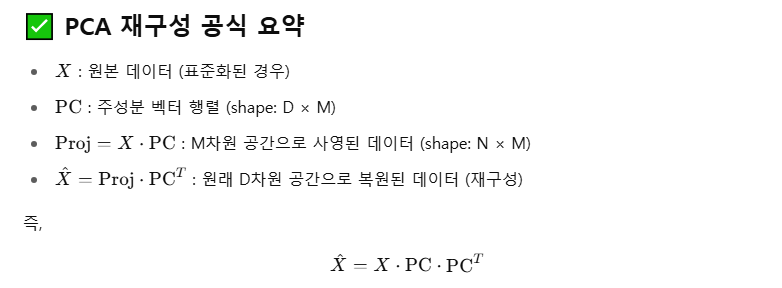

In [21]:
pca = PCA(n_components=min_components)
proj = pca.fit_transform(train)

proj.shape

(80, 5)

In [19]:
pca_t = pca.components_
pca_t.shape

(5, 10)

In [22]:
X_hat = np.matmul(proj, pca_t)
X_hat.shape

(80, 10)

In [24]:
df_X_hat = pd.DataFrame(X_hat, columns=[f"var{i+1}" for i in range(10)])
df_X_hat

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,0.032305,-0.021628,-1.353958,-0.335359,0.591714,-0.434510,-0.668982,0.243401,-1.070960,-0.395332
1,-0.497266,-0.584245,1.381350,0.826151,-1.450372,0.545753,0.364763,0.232414,1.100293,0.209064
2,1.001130,0.786375,-0.650346,0.518350,-0.208732,0.919892,0.107467,0.146076,-1.649989,-0.534453
3,-0.664758,-1.655827,-1.313219,-0.458435,0.812831,-1.692014,-0.470889,-0.489320,0.113539,-0.244627
4,-1.672864,-0.202108,1.032457,-0.958071,-0.679291,-0.317651,0.409611,-0.824596,0.438041,-1.240735
...,...,...,...,...,...,...,...,...,...,...
75,-0.922549,-0.210898,-1.063534,-0.122342,-0.035168,-0.419919,-2.100049,2.207462,0.109024,0.694923
76,-0.966050,-1.012167,-1.285496,-0.605072,0.328478,-1.158166,-0.737976,-0.077109,-0.578266,-0.811776
77,0.871035,0.284505,0.731006,-0.071140,0.321101,0.237824,1.773058,-1.975674,-0.197018,-0.590743
78,0.157932,-1.000118,0.445196,0.839330,-0.405482,-0.131943,0.190997,0.098449,1.088887,0.794827


In [27]:
X_hat_original_scale = StandardScaler().fit(train).inverse_transform(X_hat)
df_X_hat_original = pd.DataFrame(X_hat_original_scale, columns=[f"var{i+1}" for i in range(10)])
df_X_hat_original

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,0.055666,-0.019144,-1.421487,-0.333210,0.657643,-0.427360,-0.707722,0.236243,-1.158618,-0.436518
1,-0.498096,-0.594944,1.445974,0.866989,-1.448922,0.533354,0.334463,0.225094,1.055002,0.183930
2,1.068751,0.807791,-0.683881,0.548935,-0.168076,0.900032,0.075067,0.137486,-1.748945,-0.579334
3,-0.673240,-1.691635,-1.378780,-0.460386,0.885742,-1.659786,-0.508011,-0.507256,0.048994,-0.281810
4,-1.727399,-0.203853,1.080224,-0.976665,-0.653494,-0.312832,0.379678,-0.847465,0.379828,-1.304375
...,...,...,...,...,...,...,...,...,...,...
75,-0.942807,-0.212849,-1.117031,-0.113097,0.010968,-0.413060,-2.150473,2.229196,0.044391,0.682694
76,-0.988296,-1.032893,-1.349717,-0.611907,0.386096,-1.136585,-0.777279,-0.088982,-0.656310,-0.864023
77,0.932712,0.294162,0.764209,-0.060191,0.378486,0.231565,1.754257,-2.015475,-0.267623,-0.637120
78,0.187032,-1.020562,0.464591,0.880608,-0.371039,-0.130827,0.159278,0.089159,1.043373,0.785251


In [ ]:
##################################################################################################

In [28]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드 및 정규화
X, _ = load_iris(return_X_y=True)
X_std = StandardScaler().fit_transform(X)

# PCA 모델 학습 (2차원)
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_std)  # shape: (150, 2)

# 주성분 행렬 (PC: shape (4, 2))
PC = pca.components_.T  # Transpose to shape (D, M) = (4, 2)

# 원래 공간으로 복원 (X_hat: shape (150, 4))
X_hat = X_proj @ PC.T  # shape: (150, 4)

# 결과 비교 (예: 첫 5개 샘플)
print("원본 표준화 데이터 (앞 5개):\n", X_std[:5])
print("재구성 데이터 (앞 5개):\n", X_hat[:5])


원본 표준화 데이터 (앞 5개):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
재구성 데이터 (앞 5개):
 [[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]


In [29]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드 및 정규화
X, _ = load_iris(return_X_y=True)
X_std = StandardScaler().fit_transform(X)

# PCA 모델 학습 (2차원)
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_std)  # shape: (150, 2)

# 주성분 행렬 (PC: shape (4, 2))
PC = pca.components_.T  # Transpose to shape (D, M) = (4, 2)

# 원래 공간으로 복원 (X_hat: shape (150, 4))
X_hat = np.matmul(X_proj, PC.T)  # shape: (150, 4)

# 결과 비교 (예: 첫 5개 샘플)
print("원본 표준화 데이터 (앞 5개):\n", X_std[:5])
print("재구성 데이터 (앞 5개):\n", X_hat[:5])


원본 표준화 데이터 (앞 5개):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
재구성 데이터 (앞 5개):
 [[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]
